In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
import json
import random
from trueskill import Rating, quality_1vs1, rate_1vs1, TrueSkill
from tsutils import MatchSimulator, reorder_dataframe


In [ ]:

# read the data
players = pd.read_csv("data/adjusted_wildness_matches_new.csv")

# construct player_ids

player_ids = list(set(players["geo_A_id"].unique()).union(set(players["geo_B_id"].unique())))

players_reorder = reorder_dataframe(players, "geo_A_id")

# stop when achieve 75% of convergence
matches = players_reorder

simulator = MatchSimulator(matches, player_ids)
player_ratings, convergence_data, iteration_convergence_data = simulator.simulate()

#plot the convergence 

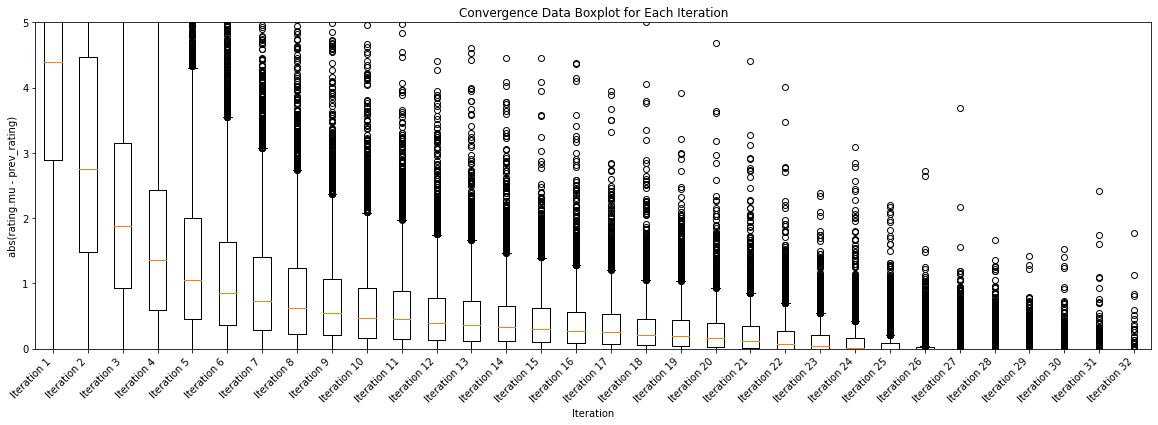

In [22]:
plt.figure(figsize=(20, 6))
plt.boxplot(iteration_convergence_data, labels=[f"Iteration {i+1}" for i in range(len(iteration_convergence_data))])
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed
plt.title('Convergence Data Boxplot for Each Iteration')
plt.xlabel('Iteration')
plt.ylabel('abs(rating.mu - prev_rating)')
plt.ylim(0, 5)  # Limit the y-axis to the range [0, 2]

# Save the plot as a PDF file
# Set the width and height of the figure, and adjust dpi for resolution
fig_size = (20, 6)  # Adjust width and height as needed
resolution = 300    # Adjust dpi as needed
plt.gcf().set_size_inches(fig_size[0], fig_size[1])
plt.savefig('convergence_plot.pdf', format='pdf', dpi=resolution)

plt.show()